In [1]:
import pandas as pd
import os
import datetime
import zipfile
import re
from Images_of_given_index import image_true_color
from IPython.display import Audio, display
from timeit import default_timer as timer
import glob
start = timer()
def alert():
  global start
  end= timer()
  print("\n\nDuration in minutes : " +  str((end - start)/60) + " minutes." )
  display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))

In [2]:
fires = pd.read_csv("./data/Fires_data/incendios2015.csv", sep=';' , encoding="utf-8",na_values="nan")
fires.head()

C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ano codigo_sgif  codigo_anpc          tipo          distrito  \
0  2015    DM315252  2,01516E+12     Florestal  Viana do Castelo   
1  2015    DM215305  2,01513E+12     Florestal             Porto   
2  2015    DM415293  2,01503E+12     Florestal             Braga   
3  2015    DM315261  2,01516E+12  Falso Alarme  Viana do Castelo   
4  2015    BL115321  2,01518E+12     AgrÃ­cola             Viseu   

             concelho           freguesia                            local  \
0       Ponte de Lima           Serdedelo      VALE DE TROVELA (SERDEDELO)   
1  Marco de Canaveses  Vila Boa de Quires                    LUGAR DO FOFO   
2          Vila Verde                Lage            RUA PROF ABEL MADEIRA   
3       Ponte de Lima            Boalhosa  J. DEPOSITOS DE AGUA (BOALHOSA)   
4        Castro Daire        Castro Daire    Farejinhas - BÂº das QueirÃ³s   

        ine         x  ...  falso_alarme fogacho incendio agricola perimetro  \
0  160746.0  167814.0  ...           0.0     0.0      1.0      0.0       NaN   
1  130731.0  193731.0  ...           0.0     0.0      1.0      0.0       NaN   
2   31323.0  172162.0  ...           0.0     1.0      0.0      0.0       NaN   
3  160709.0  171291.0  ...           1.0     0.0      0.0      0.0       NaN   
4  180304.0  217299.0  ...           0.0     1.0      0.0      0.0       NaN   

   aps  causa    tipo_causa          regiao_prof           ugf  
0  NaN  122.0    Negligente  Entre Douro e Minho    Alto Minho  
1  NaN  122.0    Negligente  Entre Douro e Minho       TÃ¢mega  
2  NaN   60.0  Desconhecida  Entre Douro e Minho   Baixo Minho  
3  NaN  630.0  Desconhecida  Entre Douro e Minho    Alto Minho  
4  NaN  630.0  Desconhecida        Beira Litoral  DÃ£o LafÃµes  

[5 rows x 38 columns]

In [3]:
fires.columns

Index(['ano', 'codigo_sgif', 'codigo_anpc', 'tipo', 'distrito', 'concelho',
       'freguesia', 'local', 'ine', 'x', 'y', 'lat', 'lon', 'data_alerta',
       'hora_alerta', 'data_extincao', 'hora_extincao',
       'data_primeira_intervencao', 'hora_primeira_intervencao',
       'fonte_alerta', 'nut', 'area_povoamento', 'area_mato', 'area_agricola',
       'area_pov_mato', 'area_total', 'reacendimento', 'queimada',
       'falso_alarme', 'fogacho', 'incendio', 'agricola', 'perimetro', 'aps',
       'causa', 'tipo_causa', 'regiao_prof', 'ugf'],
      dtype='object')

In [4]:
incendio = fires['incendio']==1
falso_alarme = fires['falso_alarme']==0 
falso_alarme_tipo = fires['tipo']!='Falso Alarme'
fogacho = fires['fogacho']==0
fires = fires[ incendio & falso_alarme & falso_alarme_tipo & fogacho]
fires.drop([
               'ano', 
               'codigo_sgif',
               'codigo_anpc',
               'data_primeira_intervencao',
               'hora_primeira_intervencao',
               'fonte_alerta',
               'nut',
               'ine',
               'causa', 'reacendimento' , 'agricola',
               'queimada','falso_alarme','fogacho','incendio','perimetro','aps', 'regiao_prof', 'ugf' 
          ],axis=1, inplace=True)
fires = fires.sort_values('area_total',  ascending=False)
fires.dropna()
fires.head()

tipo        distrito    concelho           freguesia  \
21390  Florestal           Viseu   Mangualde  PÃ³voa de CervÃ£es   
6551   Florestal          Guarda       MÃªda            Ranhados   
7081   Florestal           Viseu     Armamar        SÃ£o Cosmado   
3947   Florestal  Castelo Branco    CovilhÃ£           Verdelhos   
21637  Florestal           Braga  GuimarÃ£es        SÃ£o Torcato   

                     local         x         y                       lat  \
21390  ContenÃ§as de Baixo  237389.0  398832.0  40:33:26.5068000000082''   
6551     Pinhal das Forcas  267527.0  448034.0   40:59:54.643199999993''   
7081               Regadas  241299.0  454999.0    41:3:47.069999999992''   
3947              Sernadas  252322.0  375942.0  40:21:2.06999999999709''   
21637             BOAVISTA  189451.0  501843.0  41:29:9.29040000000384''   

                           lon data_alerta hora_alerta data_extincao  \
21390   7:41:29.922000000001''  06/08/2015    15:59:00    07/08/2015   
6551   7:19:49.9692000000005''  30/06/2015    14:34:00    01/07/2015   
7081   7:38:30.4511999999989''  30/03/2015    14:30:00    31/03/2015   
3947   7:31:2.07479999999883''  31/03/2015    09:18:00    01/04/2015   
21637  8:15:34.1676000000021''  09/08/2015    11:20:00    10/08/2015   

      hora_extincao  area_povoamento area_mato area_agricola  \
21390      07:33:00            29.89    955.11             0   
6551       00:00:00            55.50        35           7.5   
7081       02:54:00            24.85     72.89             0   
3947       04:04:00             0.00    97.404             0   
21637      03:33:00            70.00        27             0   

           area_pov_mato area_total    tipo_causa  
21390                985        985           NaN  
6551                90.5         98   Intencional  
7081   97.74000000000001      97.74    Negligente  
3947              97.404     97.404    Negligente  
21637                 97         97  Desconhecida

In [5]:
def find_images(coords,sensing_date_FROM,sensing_date_TO,filename, sentinel=2) :
    global USERNAME
    global PASSWORD
    command = "dhusget.sh -u "+USERNAME+" -p "+PASSWORD +" -S "+sensing_date_FROM+" -E "+sensing_date_TO +" -c "+coords
    if sentinel !=0 :
        command = command + " -m Sentinel-"+ str(sentinel)
    command = command + " -q " + filename +  ".xml -C " + filename + ".csv"
    os.system(command)

In [6]:
def date_to_iso_format (date,time,before=True):
    date = str(date)
    if (date=="nan") :
        return "nan"
    splited = date.split('/')
    dt = datetime.datetime(int(splited[2]), int(splited[1]),  int(splited[0]))
    iso = str(dt.year) + "-" + str(dt.month) + "-" + str(dt.day)
    newtime = "T" + time + ".000Z"
    iso = iso +  newtime
    return iso

date_to_iso_format("07/08/2015", "06:44:00")

'2015-8-7T06:44:00.000Z'

In [7]:
def dms2dd(degrees, minutes, seconds, direction):
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction == 'E' or direction == 'N':
        dd *= -1
    return dd;
print(dms2dd(8,17,1.2876,'N'))
dms2dd(39,56,36.3696,'W')

-8.283691


39.943436

In [8]:
def dms_to_decimal(text,direction):
    print(text)
    splited = text.split(':')
    if len(splited) < 3 : 
        return "0"
    else :
        degrees = splited[0]
        minutes = splited[1]
        seconds = splited[2].replace('\'', "")
    result = dms2dd(degrees, minutes, seconds, direction)
    print( result )
    return result
print(dms_to_decimal("40:33:26.5068000000082''" , 'W'))
dms_to_decimal( "7:41:29.922000000001'' ", 'N' )

40:33:26.5068000000082''
40.557363
40.557363
7:41:29.922000000001'' 
-7.691645


-7.691645

In [9]:
USERNAME = ''
PASSWORD = ''
lon1="-4"
lat1="30"
lon2="26"
lat2="46"
coords = lon1 + "," + lat1 + ":" + lon2 + "," + lat2 
sensing_date_FROM = "2015-01-01T06:00:00.000Z"
sensing_date_TO = "2016-01-01T06:00:00.000Z"
filename = "./images_with_fires_results/test"
#find_images(coords,sensing_date_FROM,sensing_date_TO,filename)

# Find Images

In [23]:
head = fires.head(250)
for index, row in head.iterrows():
    lat =dms_to_decimal(row["lat"],"W")
    lon =dms_to_decimal(row["lon"],"N")
    lon1=str( float(lon)-0.1 )
    lat1=str( float(lat)-0.1 )
    lon2=str( float(lon)+0.1 )
    lat2= str( float(lat)+0.1 )
    coords = lon1 + "," + lat1 + ":" + lon2 + "," + lat2 
    sensing_date_FROM = date_to_iso_format(row["data_alerta"] , row["hora_alerta"]  )
    sensing_date_TO = date_to_iso_format(row["data_extincao"] , row["hora_extincao"] ,False)
    filename = "./images_with_fires_results/index"+str(index)
    print(coords,sensing_date_FROM,sensing_date_TO,filename)
    print("\n")
    find_images(coords,sensing_date_FROM,sensing_date_TO,filename,sentinel=2)
    

40:33:26.5068000000082''
40.557363
7:41:29.922000000001''
-7.691645
-7.791645,40.457363:-7.591645000000001,40.657363000000004 2015-8-6T15:59:00.000Z 2015-8-7T07:33:00.000Z ./images_with_fires_results/index21390


40:59:54.643199999993''
40.998512
7:19:49.9692000000005''
-7.330547
-7.430547,40.898512:-7.2305470000000005,41.098512 2015-6-30T14:34:00.000Z 2015-7-1T00:00:00.000Z ./images_with_fires_results/index6551


41:3:47.069999999992''
41.063075
7:38:30.4511999999989''
-7.641791999999999
-7.7417919999999985,40.963074999999996:-7.541791999999999,41.163075 2015-3-30T14:30:00.000Z 2015-3-31T02:54:00.000Z ./images_with_fires_results/index7081


40:21:2.06999999999709''
40.350575
7:31:2.07479999999883''
-7.517243
-7.617242999999999,40.250575:-7.417243,40.450575 2015-3-31T09:18:00.000Z 2015-4-1T04:04:00.000Z ./images_with_fires_results/index3947


41:29:9.29040000000384''
41.485914
8:15:34.1676000000021''
-8.259491
-8.359491,41.385914:-8.159491000000001,41.585914 2015-8-9T11:20:00.000Z 2015

40:46:05
40.768055555555556
06:52:08
-6.86888888888889
-6.968888888888889,40.668055555555554:-6.76888888888889,40.86805555555556 2015-12-17T12:15:00.000Z 2015-12-17T16:35:00.000Z ./images_with_fires_results/index18373


00:38:40
0.6444444444444444
00:07:17
-0.1213888888888889
-0.2213888888888889,0.5444444444444444:-0.021388888888888888,0.7444444444444444 2015-8-3T17:19:00.000Z 2015-8-3T20:47:00.000Z ./images_with_fires_results/index21049


40:48:20.1203999999916''
40.805589
7:59:1.70519999999875''
-7.983807
-8.083807,40.705588999999996:-7.883807,40.905589 2015-3-28T13:40:00.000Z 2015-3-28T16:00:00.000Z ./images_with_fires_results/index9321


41:20:45
41.34583333333334
08:28:30
-8.475
-8.575,41.24583333333334:-8.375,41.44583333333334 2015-3-22T12:41:00.000Z 2015-3-22T17:55:00.000Z ./images_with_fires_results/index1982


41:20:30.3468000000009''
41.341763
7:15:43.8300000000002''
-7.262175
-7.362175,41.241763:-7.162175,41.441763 2015-6-5T16:16:00.000Z 2015-6-5T19:08:00.000Z ./images_with_

00:40:49.918
0.6805327777777778
00:07:15.594
-0.12099833333333333
-0.22099833333333335,0.5805327777777778:-0.020998333333333327,0.7805327777777777 2015-8-5T13:28:00.000Z 2015-8-5T19:27:00.000Z ./images_with_fires_results/index9750


38:57:58.7987999999956''
38.966333
9:5:56.7347999999996''
-9.099093
-9.199093,38.866333:-8.999093,39.066333 2015-9-12T11:44:00.000Z 2015-9-13T01:40:00.000Z ./images_with_fires_results/index15685


39:18:14.8535999999876''
39.304126
9:15:19.6920000000027''
-9.25547
-9.35547,39.204125999999995:-9.155470000000001,39.404126 2015-9-13T13:00:00.000Z 2015-9-13T21:45:00.000Z ./images_with_fires_results/index15798


39:39:48.8700000000057''
39.663575
7:41:2.06519999999855''
-7.683907
-7.783906999999999,39.563575:-7.583907,39.763575 2015-9-12T14:07:00.000Z 2015-9-12T17:46:00.000Z ./images_with_fires_results/index15606


38:32:29.324400000009''
38.541479
9:2:33.5400000000003''
-9.04265
-9.14265,38.441479:-8.94265,38.641479000000004 2015-7-5T15:00:00.000Z 2015-7-5T17:4

41:28:46
41.47944444444445
07:47:34
-7.792777777777777
-7.892777777777777,41.379444444444445:-7.692777777777778,41.57944444444445 2015-3-8T13:15:00.000Z 2015-3-8T16:44:00.000Z ./images_with_fires_results/index3114


41:3:44.3376000000097''
41.062316
8:8:29.2523999999976''
-8.141459
-8.241458999999999,40.962316:-8.041459,41.162316000000004 2015-7-7T02:14:00.000Z 2015-7-7T12:54:00.000Z ./images_with_fires_results/index20110


41:26:30.2927999999889''
41.441748
7:49:54.7607999999988''
-7.831878
-7.931877999999999,41.341747999999995:-7.731878,41.541748 2015-4-5T17:55:00.000Z 2015-4-5T22:05:00.000Z ./images_with_fires_results/index4697


38:51:28.9079999999979''
38.85803
9:12:13.7627999999995''
-9.203823
-9.303823,38.75803:-9.103823,38.95803 2015-9-28T12:54:00.000Z 2015-9-28T17:44:00.000Z ./images_with_fires_results/index22962


41:32:04
41.53444444444444
08:10:14
-8.170555555555556
-8.270555555555555,41.43444444444444:-8.070555555555556,41.63444444444444 2015-4-5T17:12:00.000Z 2015-4-5T21:

41:3:11.8584000000038''
41.053294
8:11:46.2300000000008''
-8.196175
-8.296175,40.953294:-8.096175,41.153294 2015-12-19T14:10:00.000Z 2015-12-19T19:23:00.000Z ./images_with_fires_results/index18377


40:11:39.1812000000067''
40.194217
8:6:5.06520000000009''
-8.101407
-8.201407,40.094217:-8.001407,40.294217 2015-9-2T16:55:00.000Z 2015-9-2T20:01:00.000Z ./images_with_fires_results/index19202


40:46:41.3291999999893''
40.778147
7:47:5.4851999999989''
-7.784857
-7.884856999999999,40.678146999999996:-7.684857,40.878147 2015-4-2T11:43:00.000Z 2015-4-3T04:34:00.000Z ./images_with_fires_results/index1517


41:41:52.1771999999879''
41.697827
7:39:47.0159999999991''
-7.66306
-7.763059999999999,41.597826999999995:-7.56306,41.797827 2015-9-7T02:12:00.000Z 2015-9-7T03:45:00.000Z ./images_with_fires_results/index20268


40:51:59.89319999999''
40.866637
8:23:8.80800000000164''
-8.38578
-8.48578,40.766636999999996:-8.28578,40.966637 2015-7-17T11:54:00.000Z 2015-7-17T13:11:00.000Z ./images_with_fires_r

00:40:22.398
0.6728883333333333
00:07:15.806
-0.12105722222222222
-0.22105722222222224,0.5728883333333333:-0.021057222222222213,0.7728883333333333 2015-6-17T16:49:00.000Z 2015-6-17T18:22:00.000Z ./images_with_fires_results/index15319


41:39:34
41.659444444444446
07:14:17
-7.2380555555555555
-7.338055555555555,41.559444444444445:-7.138055555555556,41.75944444444445 2015-4-13T17:30:00.000Z 2015-4-13T21:10:00.000Z ./images_with_fires_results/index2635


40Âº54'40.957200000006''
7Âº44'26.9123999999986''
-0.1,-0.1:0.1,0.1 2015-1-4T12:02:00.000Z 2015-1-4T16:41:00.000Z ./images_with_fires_results/index2862


41:40:37
41.676944444444445
07:34:51
-7.5808333333333335
-7.680833333333333,41.57694444444444:-7.480833333333334,41.776944444444446 2015-4-4T12:57:00.000Z 2015-4-5T00:30:00.000Z ./images_with_fires_results/index5437


41:25:53.5835999999961''
41.431551
8:8:8.25360000000089''
-8.135626
-8.235626,41.331551:-8.035626,41.531551 2015-8-10T17:15:00.000Z 2015-8-11T03:00:00.000Z ./images_with_fi

41:19:45.7248000000084''
41.329368
8:31:48.0972000000017''
-8.530027
-8.630027,41.229368:-8.430027,41.429368000000004 2015-7-10T15:25:00.000Z 2015-7-11T07:35:00.000Z ./images_with_fires_results/index10058


41:33:12.1392000000111''
41.553372
8:15:39.2760000000031''
-8.26091
-8.36091,41.453372:-8.160910000000001,41.653372000000005 2015-2-10T12:58:00.000Z 2015-2-10T17:40:00.000Z ./images_with_fires_results/index7635


41:59:59.5932000000039''
41.999887
8:36:4.60799999999693''
-8.60128
-8.701279999999999,41.899887:-8.50128,42.099887 2015-3-22T19:43:00.000Z 2015-3-23T02:35:00.000Z ./images_with_fires_results/index6992


41:7:35.6304000000068''
41.126564
7:45:54.5939999999987''
-7.765165
-7.865164999999999,41.026564:-7.665165,41.226564 2015-8-29T14:34:00.000Z 2015-8-29T19:37:00.000Z ./images_with_fires_results/index13209


41:21:45.5292000000094''
41.362647
7:40:59.7539999999984''
-7.683265
-7.783264999999999,41.262647:-7.583265,41.462647000000004 2015-7-7T16:40:00.000Z 2015-7-7T18:02:00.00

# Download images

In [24]:
files = glob.glob("./images_with_fires_results/*.csv")

for file in files : 
    global USERNAME, PASSWORD
    if (os.path.getsize(file) >0 ) :
        downloads = pd.read_csv(file, sep=',' , encoding="utf-8",na_values="nan",header=None)
        splited = file.split('\\')
        id_fire = splited[len(splited)-1][:-4]
        for index, row in downloads.iterrows():
            outputpath = "../../Satellite_img/" + id_fire
            if (not os.path.isdir(outputpath)):
                os.mkdir(outputpath)
            outputpath = outputpath + '/' + row[0] + '.zip'
            command = "wget --continue --user="+USERNAME+" --password="+PASSWORD+" \""+ row[1] + "/$value" +"\" -O " + outputpath
            print(outputpath,"\n\n")
            os.system(command)

../../Satellite_img/index12634/S2A_MSIL1C_20150728T113056_N0204_R080_T29TNG_20150728T113618.zip 


../../Satellite_img/index12634/S2A_MSIL1C_20150728T113056_N0204_R080_T29TNF_20150728T113618.zip 


../../Satellite_img/index19195/S2A_MSIL1C_20151122T112402_N0204_R037_T29TPE_20151122T112924.zip 


../../Satellite_img/index19195/S2A_MSIL1C_20151122T112402_N0204_R037_T29TPF_20151122T112924.zip 


../../Satellite_img/index20831/S2A_MSIL1C_20150804T112046_N0204_R037_T29TNE_20150804T112539.zip 




# Unnzipping and setting up downloaded images

In [25]:
indexs = os.listdir("../../Satellite_img/") 
print ( indexs)  # indexes of fires of images founded
for index in indexs :
    index_id = index[5:]
    path = "../../Satellite_img/index"+ index_id
    images_ids = os.listdir(path) # images founded for index choosen
    for file in images_ids : 
        print(file)
        path_with_img_id = path + "/" + file
        if ( zipfile.is_zipfile(path_with_img_id) and os.stat(path_with_img_id).st_size >0  ) :
            with zipfile.ZipFile(path_with_img_id,"r") as zip_ref:
                path_output = path + "/" + file [ 37 :  ]
                cut = len(path_output)-4
                path_output = path_output [ : cut ]
                print(path_output)
                names = zip_ref.namelist()
                regexp = re.compile(r'.*SAFE/GRANULE/.*/IMG_DATA/.*B0[2348]')
                img_data = []
                for f in names :
                    if  regexp.search(f) :
                        img_data.append(f)
                print(len(img_data))
                zip_ref.extractall(  members =  img_data , path = path_output )
        os.remove(path_with_img_id)

['index12634', 'index19195', 'index20831']
S2A_MSIL1C_20150728T113056_N0204_R080_T29TNF_20150728T113618.zip
../../Satellite_img/index12634/_T29TNF_20150728T113618
4
S2A_MSIL1C_20150728T113056_N0204_R080_T29TNG_20150728T113618.zip
../../Satellite_img/index12634/_T29TNG_20150728T113618
4
S2A_MSIL1C_20151122T112402_N0204_R037_T29TPE_20151122T112924.zip
../../Satellite_img/index19195/_T29TPE_20151122T112924
4
S2A_MSIL1C_20151122T112402_N0204_R037_T29TPF_20151122T112924.zip
../../Satellite_img/index19195/_T29TPF_20151122T112924
4
S2A_MSIL1C_20150804T112046_N0204_R037_T29TNE_20150804T112539.zip
../../Satellite_img/index20831/_T29TNE_20150804T112539
4


# Visualizing images

In [26]:
indexs = os.listdir("../../Satellite_img/") 
n_total = 0
for index in indexs :
    index_id = index[5:]
    path = "../../Satellite_img/index"+ index_id
    images_ids = os.listdir(path) 
    for image_id in images_ids : 
        n_total = n_total + 1
print("Number of Images = ",n_total )

Number of Images =  5




->>>>>>>>>>>>>>>>>> 12634    _T29TNF_20150728T113618       Image 1  of  5   

 


C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\IPython\core\interactiveshell.py:3319: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


-7.940727 41.557427
8435 9235 0 283


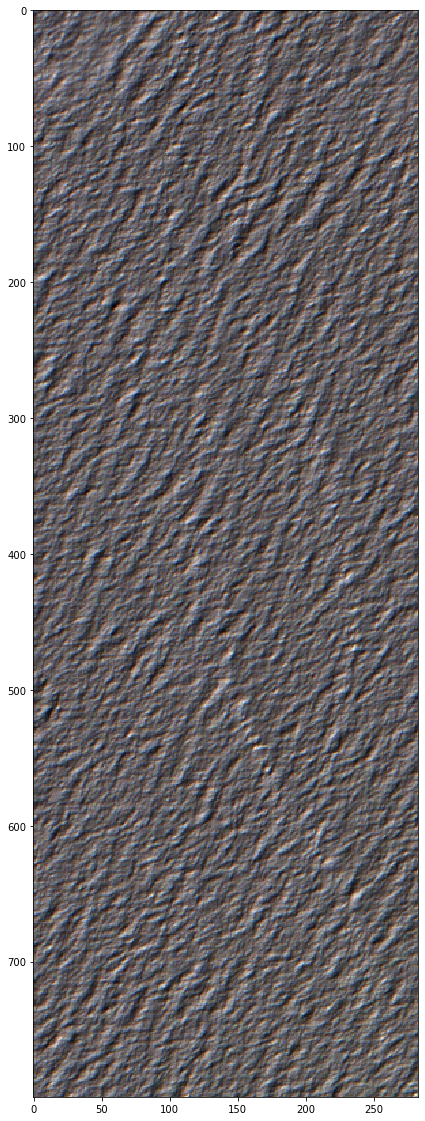



Duration in minutes : 344.37334373 minutes.




->>>>>>>>>>>>>>>>>> 12634    _T29TNG_20150728T113618       Image 2  of  5   

 


C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\IPython\core\interactiveshell.py:3319: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


-7.940727 41.557427
8435 9235 9485 10285


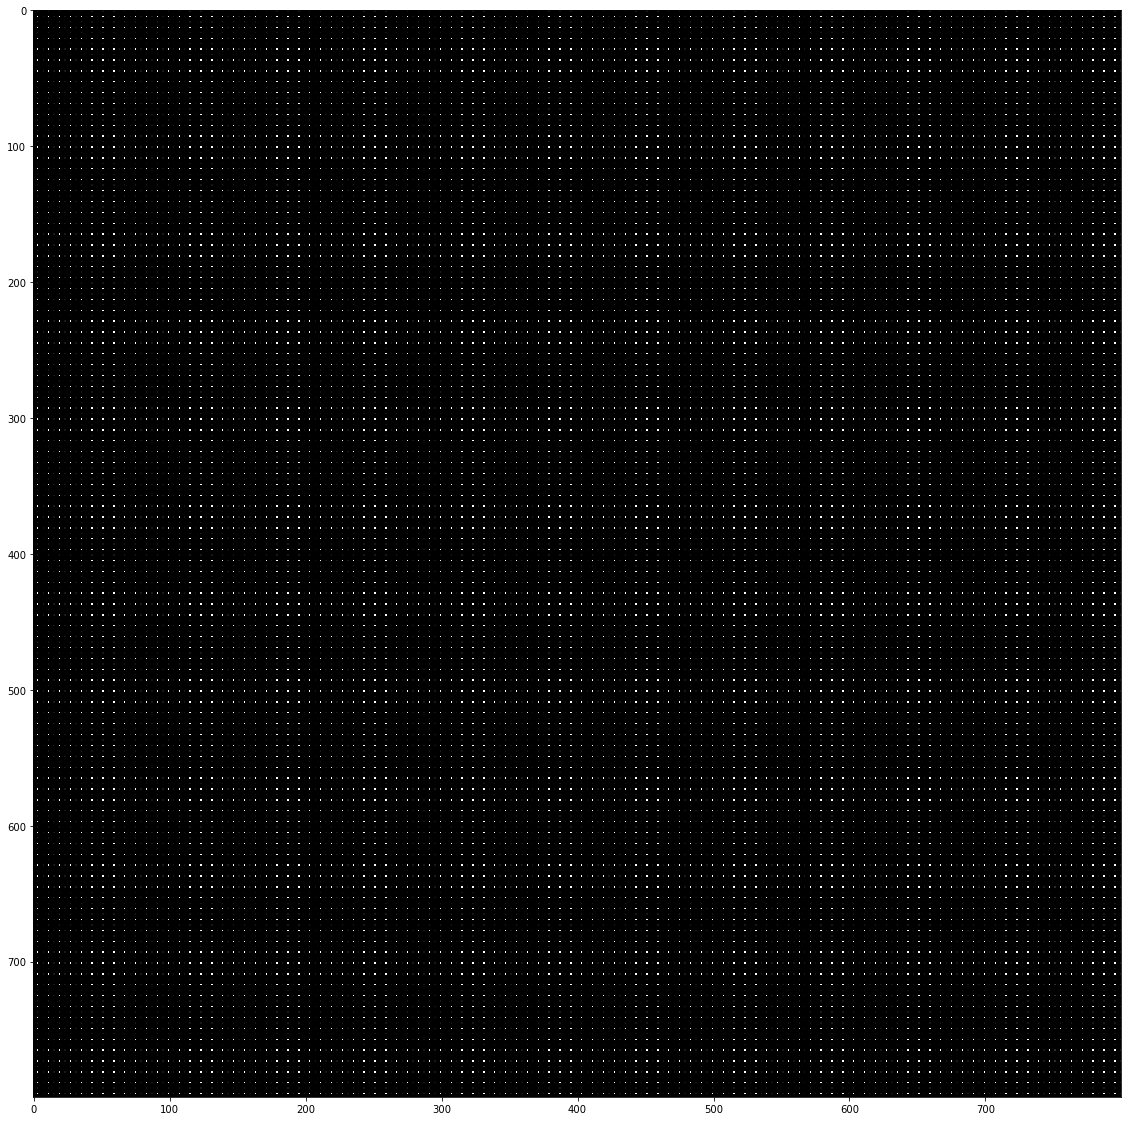



Duration in minutes : 350.15560336500005 minutes.




->>>>>>>>>>>>>>>>>> 19195    _T29TPE_20151122T112924       Image 3  of  5   

 


C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\IPython\core\interactiveshell.py:3319: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


-7.471611 40.470608
2556 3356 1488 2288


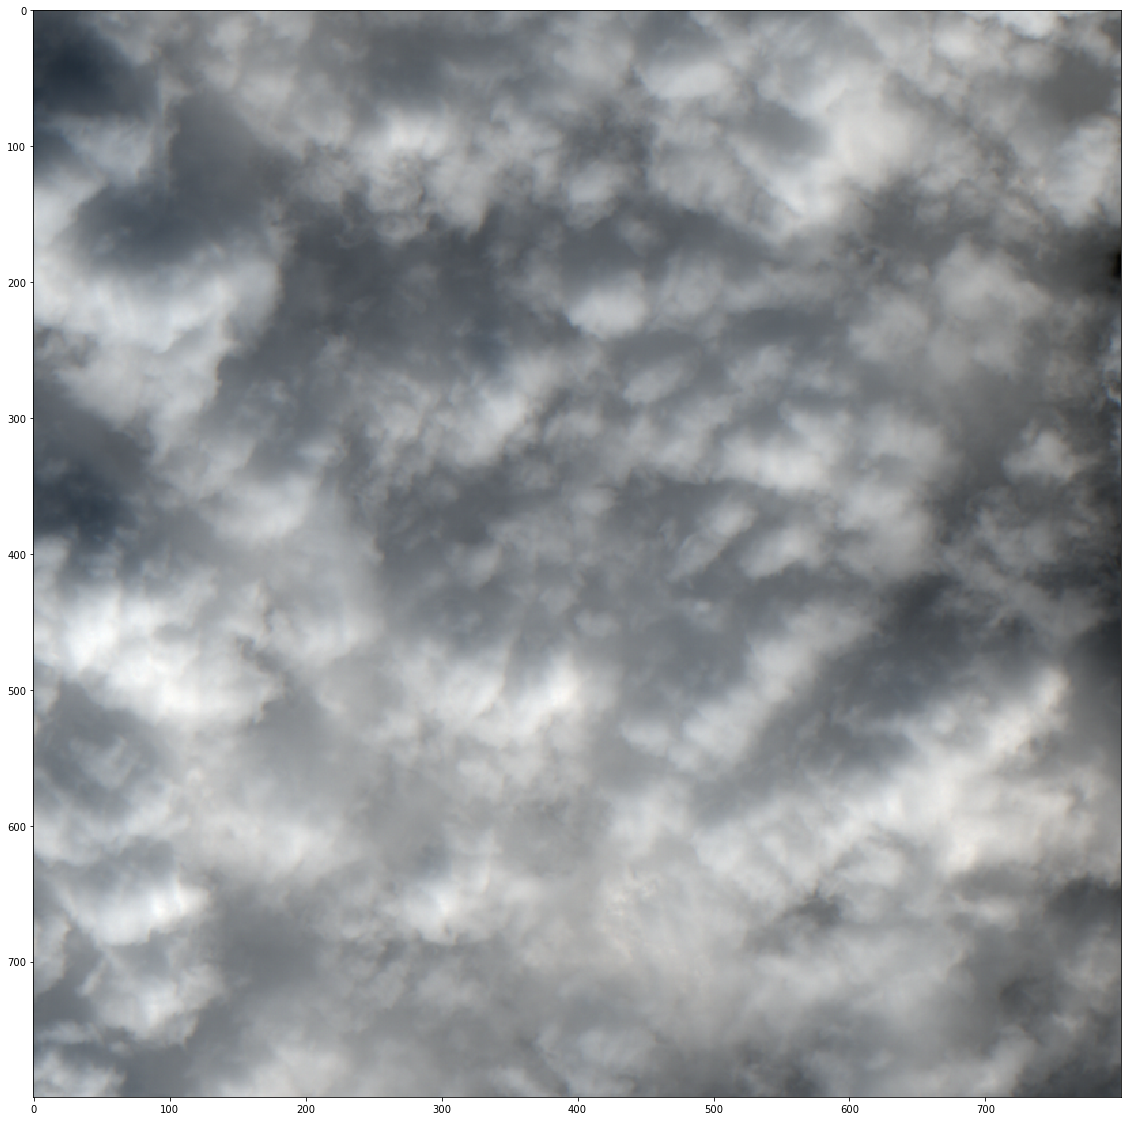



Duration in minutes : 356.1321710066667 minutes.




->>>>>>>>>>>>>>>>>> 19195    _T29TPF_20151122T112924       Image 4  of  5   

 


C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\IPython\core\interactiveshell.py:3319: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


-7.471611 40.470608
2556 3356 10880 10980


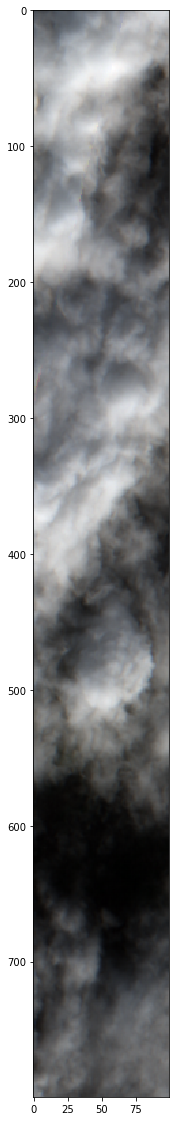



Duration in minutes : 362.18982093 minutes.




->>>>>>>>>>>>>>>>>> 20831    _T29TNE_20150804T112539       Image 5  of  5   

 


C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\IPython\core\interactiveshell.py:3319: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


-7.966883 39.976159
8423 9223 7037 7837


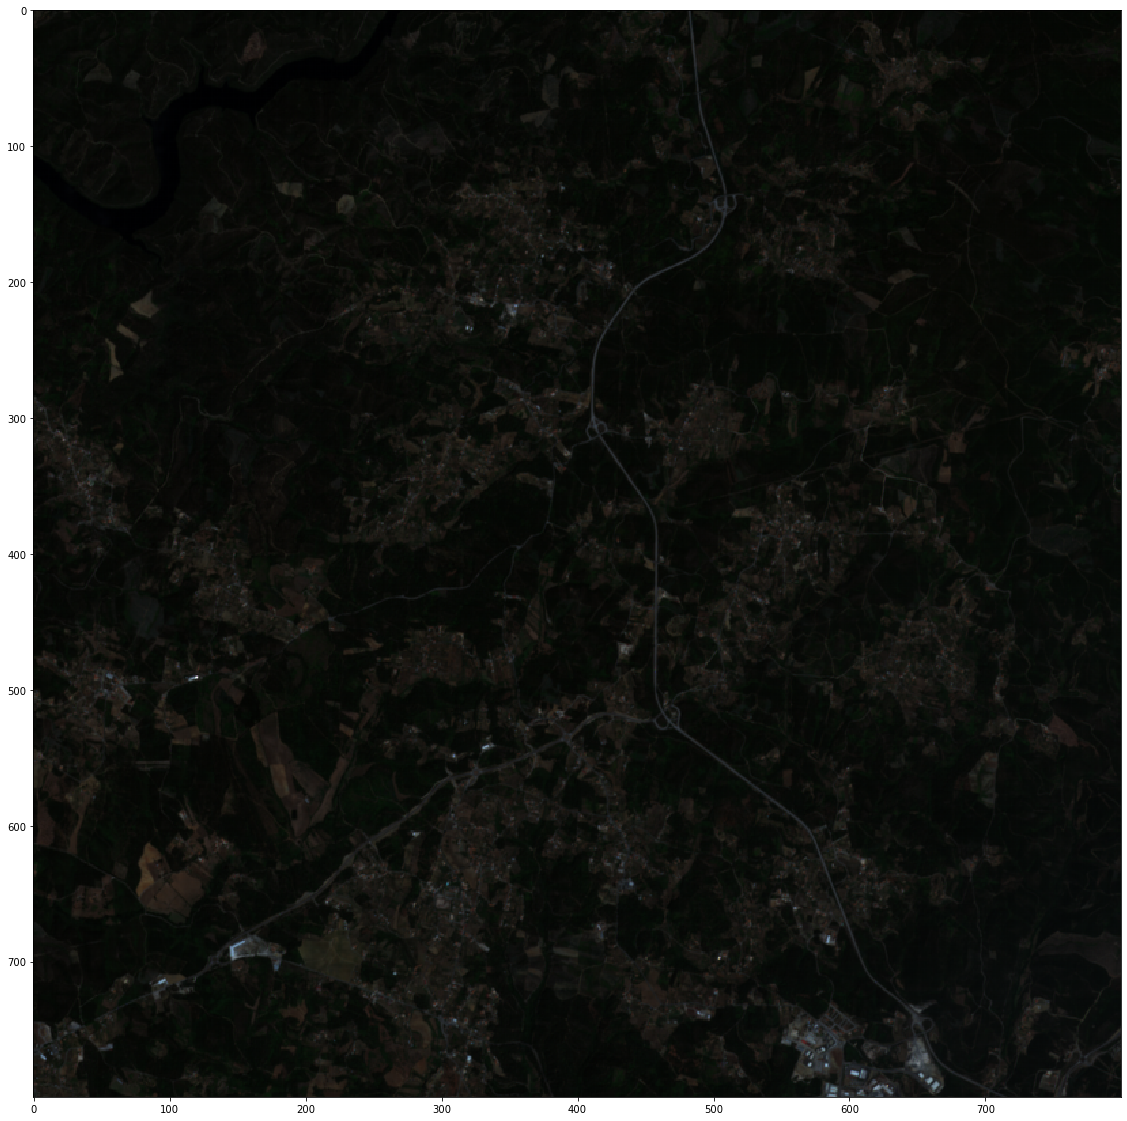



Duration in minutes : 368.4021394933334 minutes.


In [27]:
indexs = os.listdir("../../Satellite_img/")
n=0
for index in indexs :
    index_id = index[5:]
    path = "../../Satellite_img/index"+ index_id
    images_ids = os.listdir(path) # images founded for index choosen
    for image_id in images_ids :
        n= n + 1 
        print("\n\n->>>>>>>>>>>>>>>>>>", index_id,"  " ,image_id, "      Image", n ," of " , n_total ,"  \n\n " )
        #if index_id == '12463' and image_id == "_T29SMD_20150728T113618" :
        image_true_color(index_id,image_id ,"../../Satellite_img/")
        alert()